# **Exercícios**

### ***Importação de pacotes***

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Dataset escolhido:
- Appliances energy prediction dataset
https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
- Contém consumo de energia (Appliances) e variáveis ambientais (temperatura, umidade,
condições internas/externas).

## 26. Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe())

In [2]:
# Link para o conjunto de dados: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction
dados = pd.read_csv("/content/energydata_complete.csv", sep=',', low_memory=False)

### ***Análise Exploratória***

In [3]:
print(f'O dataframe possui {dados.shape[0]} registros (linhas) e {dados.shape[1]} atributos (colunas)')

O dataframe possui 19735 registros (linhas) e 29 atributos (colunas)


In [4]:
dados.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
dados.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
dados.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## 27. Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

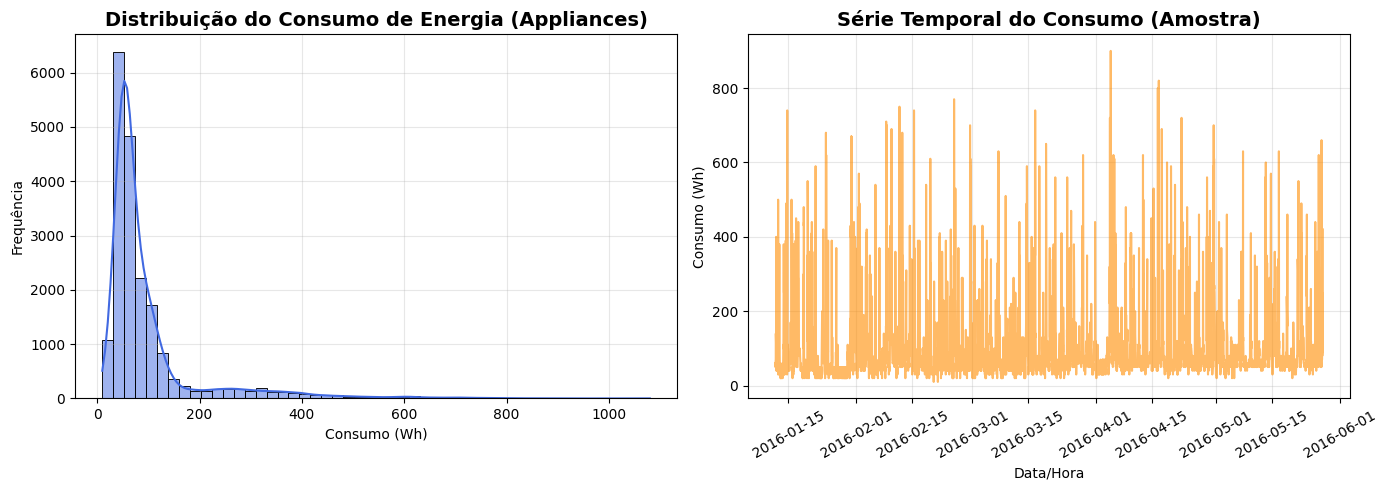

In [8]:
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
sns.histplot(dados['Appliances'], bins=50, kde=True, color='royalblue')
plt.title('Distribuição do Consumo de Energia (Appliances)', fontsize=14, weight='bold')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)

if 'date' in dados.columns:
    dados['date'] = pd.to_datetime(dados['date'])
    amostra_tempo = dados.sample(n=5000, random_state=42).sort_values('date')
    plt.plot(amostra_tempo['date'], amostra_tempo['Appliances'], alpha=0.6, color='darkorange')
    plt.title('Série Temporal do Consumo (Amostra)', fontsize=14, weight='bold')
    plt.xlabel('Data/Hora')
    plt.ylabel('Consumo (Wh)')
    plt.xticks(rotation=30)
    plt.grid(alpha=0.3)
else:
    plt.text(0.5, 0.5, 'Coluna de data não encontrada', ha='center', va='center')

plt.tight_layout()
plt.show()

In [9]:
q1 = dados['Appliances'].quantile(0.25)
q3 = dados['Appliances'].quantile(0.75)
mediana = dados['Appliances'].median()
media = dados['Appliances'].mean()

print(f"Mediana: {mediana:.2f} Wh")
print(f"Média: {media:.2f} Wh")
print(f"1º quartil: {q1:.2f} Wh")
print(f"3º quartil: {q3:.2f} Wh")

if media < q3 and mediana < q3:
    interpretacao = "O consumo tende a se concentrar em valores baixos, com poucos picos altos."
else:
    interpretacao = "O consumo apresenta valores mais distribuídos ou concentrados em níveis mais altos."

print(f"\nInterpretação: {interpretacao}")

Mediana: 60.00 Wh
Média: 97.69 Wh
1º quartil: 50.00 Wh
3º quartil: 100.00 Wh

Interpretação: O consumo tende a se concentrar em valores baixos, com poucos picos altos.


## 28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

In [10]:
# Selecionar colunas de temperatura e umidade
variaveis_ambientais = [col for col in dados.columns if 'T' in col or 'RH' in col]

# Calcular correlação de cada variável ambiental com Appliances
correlacoes = dados[variaveis_ambientais + ['Appliances']].corr()['Appliances'].drop('Appliances')

# Ordenar por valor absoluto da correlação
correlacoes_ordenadas = correlacoes.reindex(correlacoes.abs().sort_values(ascending=False).index)

print("=== Correlações com Appliances ===")
print(correlacoes_ordenadas)

=== Correlações com Appliances ===
RH_out      -0.152282
T2           0.120073
T6           0.117638
T_out        0.099155
RH_8        -0.094039
RH_1         0.086031
T3           0.085060
RH_6        -0.083178
RH_2        -0.060465
RH_7        -0.055642
T1           0.055447
RH_9        -0.051462
T4           0.040281
T8           0.039572
RH_3         0.036292
T7           0.025801
T5           0.019760
RH_4         0.016965
Tdewpoint    0.015353
T9           0.010010
RH_5         0.006955
Name: Appliances, dtype: float64


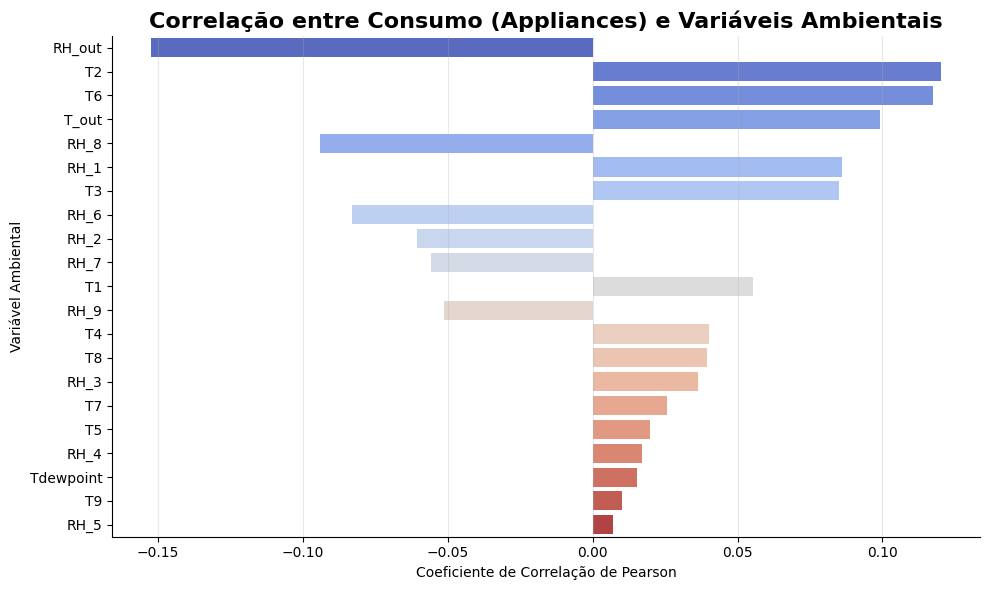

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=correlacoes_ordenadas.values,
    y=correlacoes_ordenadas.index,
    hue=correlacoes_ordenadas.index,  # usa o próprio y como hue
    palette='coolwarm',
    legend=False
)

plt.title('Correlação entre Consumo (Appliances) e Variáveis Ambientais', fontsize=16, weight='bold')
plt.xlabel('Coeficiente de Correlação de Pearson')
plt.ylabel('Variável Ambiental')
plt.grid(axis='x', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [12]:
# Pega as 3 variáveis com maior correlação absoluta
top3 = correlacoes_ordenadas.head(3)

print("\nVariáveis com maior relação com o consumo:")
for var, corr in top3.items():
    direcao = "positiva" if corr > 0 else "negativa"
    print(f"- {var}: correlação {direcao} de {corr:.3f}")

# Resposta resumida
mais_forte = top3.index[0]
print(f"\nResposta: A variável ambiental mais relacionada ao consumo é '{mais_forte}', "
      f"seguida por {top3.index[1]} e {top3.index[2]}.")


Variáveis com maior relação com o consumo:
- RH_out: correlação negativa de -0.152
- T2: correlação positiva de 0.120
- T6: correlação positiva de 0.118

Resposta: A variável ambiental mais relacionada ao consumo é 'RH_out', seguida por T2 e T6.


## 29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [13]:
# Selecionar apenas colunas numéricas
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Criar o scaler
scaler = MinMaxScaler()

# Ajustar e transformar os dados numéricos
dados_normalizados_array = scaler.fit_transform(dados[colunas_numericas])

# Criar DataFrame normalizado mantendo nomes das colunas
dados_normalizados = pd.DataFrame(dados_normalizados_array, columns=colunas_numericas)

# Se quiser manter as colunas não numéricas (ex.: data), podemos concatenar:
colunas_nao_numericas = dados.drop(columns=colunas_numericas)
dados_normalizados = pd.concat([colunas_nao_numericas.reset_index(drop=True),
                                 dados_normalizados.reset_index(drop=True)], axis=1)

print("Normalização concluída. Intervalo esperado: 0 a 1")
display(dados_normalizados.head())

Normalização concluída. Intervalo esperado: 0 a 1


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [14]:
# Conferir se todas as colunas numéricas estão no intervalo [0, 1]
minimos = dados_normalizados[colunas_numericas].min()
maximos = dados_normalizados[colunas_numericas].max()

print("Mínimos por coluna (deve ser 0.0):")
print(minimos)

print("\nMáximos por coluna (deve ser 1.0):")
print(maximos)

Mínimos por coluna (deve ser 0.0):
Appliances     0.0
lights         0.0
T1             0.0
RH_1           0.0
T2             0.0
RH_2           0.0
T3             0.0
RH_3           0.0
T4             0.0
RH_4           0.0
T5             0.0
RH_5           0.0
T6             0.0
RH_6           0.0
T7             0.0
RH_7           0.0
T8             0.0
RH_8           0.0
T9             0.0
RH_9           0.0
T_out          0.0
Press_mm_hg    0.0
RH_out         0.0
Windspeed      0.0
Visibility     0.0
Tdewpoint      0.0
rv1            0.0
rv2            0.0
dtype: float64

Máximos por coluna (deve ser 1.0):
Appliances     1.0
lights         1.0
T1             1.0
RH_1           1.0
T2             1.0
RH_2           1.0
T3             1.0
RH_3           1.0
T4             1.0
RH_4           1.0
T5             1.0
RH_5           1.0
T6             1.0
RH_6           1.0
T7             1.0
RH_7           1.0
T8             1.0
RH_8           1.0
T9             1.0
RH_9           1.0
T_

## 30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

In [15]:
# Selecionar apenas colunas numéricas normalizadas (excluindo data, se existir)
colunas_numericas_norm = dados_normalizados.select_dtypes(include=['float64', 'int64']).columns

# Aplicar PCA
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_normalizados[colunas_numericas_norm])

# Criar DataFrame com as componentes principais
dados_pca_df = pd.DataFrame(dados_pca, columns=['PC1', 'PC2'])

print("Variância explicada por cada componente:")

for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

print(f"Variância acumulada: {pca.explained_variance_ratio_.sum():.2%}")

Variância explicada por cada componente:
PC1: 36.09%
PC2: 20.91%
Variância acumulada: 57.00%


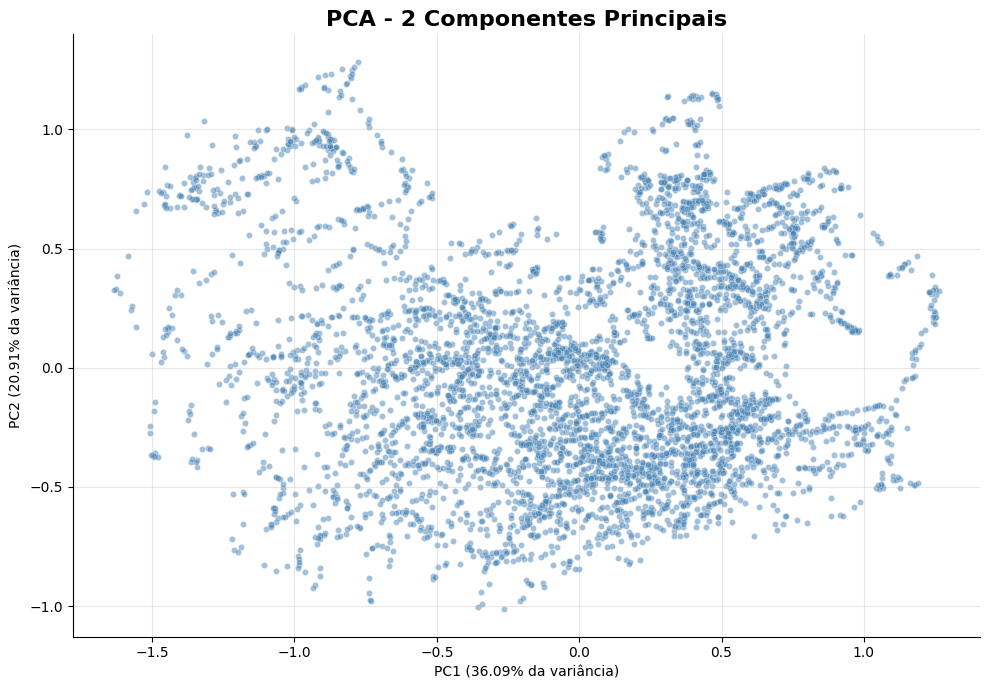

In [16]:
# Amostra para não pesar o gráfico
amostra_plot = dados_pca_df.sample(n=5000, random_state=42)

plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PC1', y='PC2',
    data=amostra_plot,
    alpha=0.5, s=20, color='steelblue'
)
plt.title('PCA - 2 Componentes Principais', fontsize=16, weight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% da variância)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% da variância)')
plt.grid(alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

In [17]:
# Medida simples de dispersão para ver se há "clusters" visíveis
corr_pc = abs(np.corrcoef(dados_pca_df['PC1'], dados_pca_df['PC2'])[0,1])

if corr_pc < 0.3:
    interpretacao = "Os componentes principais não apresentam forte correlação, mas não há indícios claros de agrupamentos naturais visíveis."
else:
    interpretacao = "Os componentes principais mostram alguma correlação, mas ainda não há separações evidentes em grupos."

print(f"Interpretação: {interpretacao}")

Interpretação: Os componentes principais não apresentam forte correlação, mas não há indícios claros de agrupamentos naturais visíveis.


## 31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [18]:
# Selecionar variáveis ambientais (temperatura e umidade)
variaveis_ambientais = [col for col in dados.columns if 'T' in col or 'RH' in col]

# Definir X e y
X = dados[variaveis_ambientais].dropna()
y = dados['Appliances'].loc[X.index]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [19]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f} Wh")

# Interpretação automática
if r2 > 0.7:
    interpretacao = "O modelo explica bem a variação do consumo."
elif r2 > 0.4:
    interpretacao = "O modelo explica parte da variação do consumo, mas há espaço para melhorias."
else:
    interpretacao = "O modelo explica pouco da variação do consumo; outros fatores podem ser mais relevantes."

print(f"Interpretação: {interpretacao}")

R²: 0.1478
RMSE: 93.6985 Wh
Interpretação: O modelo explica pouco da variação do consumo; outros fatores podem ser mais relevantes.


In [20]:
# Coeficientes do modelo
import pandas as pd

coeficientes = pd.Series(modelo.coef_, index=variaveis_ambientais).sort_values(key=abs, ascending=False)

print("\nVariáveis mais influentes no modelo:")
display(coeficientes.head(10))


Variáveis mais influentes no modelo:


,0
T3,25.566677
T9,-21.193346
T2,-19.190582
RH_1,16.307442
RH_2,-14.045487
T_out,-12.355624
T8,9.587178
Tdewpoint,7.450325
T6,7.350771
RH_8,-5.615478


## 32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [21]:
# Criar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,       # número de árvores
    random_state=42,
    n_jobs=-1               # usa todos os núcleos para acelerar
)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Métricas
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"R² (Random Forest): {r2_rf:.4f}")
print(f"RMSE (Random Forest): {rmse_rf:.4f} Wh")

R² (Random Forest): 0.5627
RMSE (Random Forest): 67.1180 Wh


In [22]:
print(f"RMSE (Regressão Linear): {rmse:.4f} Wh")
print(f"RMSE (Random Forest): {rmse_rf:.4f} Wh")

if rmse_rf < rmse:
    interpretacao = "O Random Forest apresentou melhor desempenho (menor RMSE) que a regressão linear."
elif rmse_rf > rmse:
    interpretacao = "A regressão linear apresentou melhor desempenho (menor RMSE) que o Random Forest."
else:
    interpretacao = "Ambos os modelos tiveram desempenho equivalente."

print(f"Interpretação: {interpretacao}")

RMSE (Regressão Linear): 93.6985 Wh
RMSE (Random Forest): 67.1180 Wh
Interpretação: O Random Forest apresentou melhor desempenho (menor RMSE) que a regressão linear.



Variáveis mais importantes no Random Forest:


,0
RH_1,0.078243
RH_2,0.064437
RH_3,0.060755
RH_5,0.060709
T3,0.058022
RH_7,0.056711
RH_out,0.056556
RH_8,0.053936
RH_9,0.051255
RH_4,0.046855


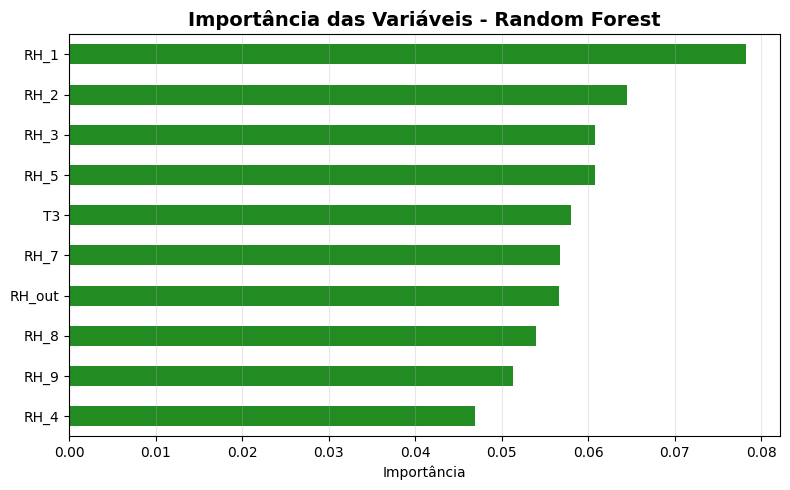

In [23]:
importancias = pd.Series(rf_model.feature_importances_, index=variaveis_ambientais)
importancias = importancias.sort_values(ascending=False)

print("\nVariáveis mais importantes no Random Forest:")
display(importancias.head(10))

# Visualização
importancias.head(10).plot(kind='barh', figsize=(8,5), color='forestgreen')
plt.title('Importância das Variáveis - Random Forest', fontsize=14, weight='bold')
plt.xlabel('Importância')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

In [24]:
# Amostra única para todos os k
tamanho_amostra = min(50000, len(dados))
amostra_cluster = dados[['Appliances']].dropna().sample(n=tamanho_amostra, random_state=42).copy()

# Criar clusters para k=3,4,5
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    amostra_cluster[f'Cluster_{k}'] = kmeans.fit_predict(amostra_cluster[['Appliances']])

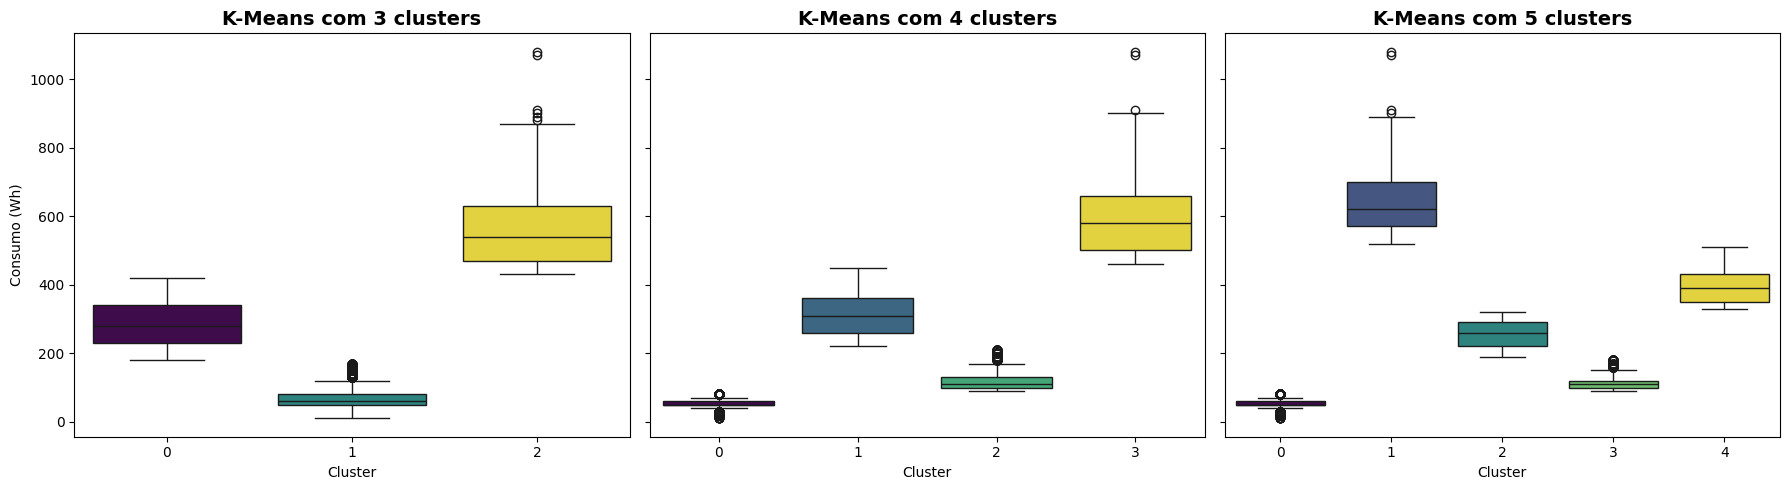

In [25]:
# Plot
fig, axes = plt.subplots(1, 3, figsize=(18,5), sharey=True)

for idx, k in enumerate(range(3, 6)):
    sns.boxplot(
        x=f'Cluster_{k}',
        y='Appliances',
        data=amostra_cluster,
        hue=f'Cluster_{k}',       # evita warning
        palette='viridis',
        legend=False,
        ax=axes[idx]
    )
    axes[idx].set_title(f'K-Means com {k} clusters', fontsize=14, weight='bold')
    axes[idx].set_xlabel('Cluster')
    if idx == 0:
        axes[idx].set_ylabel('Consumo (Wh)')
    else:
        axes[idx].set_ylabel('')

plt.tight_layout()
plt.show()

In [26]:
for k in range(3, 6):
    medias = amostra_cluster.groupby(f'Cluster_{k}')['Appliances'].mean().sort_values()
    print(f"\n=== Perfis médios - {k} clusters ===")
    for cluster_id, media in medias.items():
        print(f"Cluster {cluster_id}: consumo médio de {media:.2f} Wh")


=== Perfis médios - 3 clusters ===
Cluster 1: consumo médio de 67.21 Wh
Cluster 0: consumo médio de 287.70 Wh
Cluster 2: consumo médio de 566.53 Wh

=== Perfis médios - 4 clusters ===
Cluster 0: consumo médio de 54.06 Wh
Cluster 2: consumo médio de 116.20 Wh
Cluster 1: consumo médio de 314.88 Wh
Cluster 3: consumo médio de 593.51 Wh

=== Perfis médios - 5 clusters ===
Cluster 0: consumo médio de 54.06 Wh
Cluster 3: consumo médio de 111.96 Wh
Cluster 2: consumo médio de 254.16 Wh
Cluster 4: consumo médio de 395.70 Wh
Cluster 1: consumo médio de 641.15 Wh


In [27]:
# Exemplo usando k=3 para interpretar
medias_k3 = amostra_cluster.groupby('Cluster_3')['Appliances'].mean().sort_values()

perfil_baixo = medias_k3.index[0]
perfil_medio = medias_k3.index[1]
perfil_alto = medias_k3.index[2]

print("Interpretação (k=3):")
print(f"- Cluster {perfil_baixo}: perfil de baixo consumo, típico de residências/equipamentos pouco utilizados.")
print(f"- Cluster {perfil_medio}: perfil intermediário, possivelmente uso regular de eletrodomésticos.")
print(f"- Cluster {perfil_alto}: perfil de alto consumo, possivelmente com uso intensivo ou equipamentos de alta potência.")

Interpretação (k=3):
- Cluster 1: perfil de baixo consumo, típico de residências/equipamentos pouco utilizados.
- Cluster 0: perfil intermediário, possivelmente uso regular de eletrodomésticos.
- Cluster 2: perfil de alto consumo, possivelmente com uso intensivo ou equipamentos de alta potência.


## 34. Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [28]:
# Criar variável binária: 1 = alto consumo, 0 = baixo consumo
mediana_consumo = dados['Appliances'].median()
dados['Consumo_Alto'] = (dados['Appliances'] > mediana_consumo).astype(int)

print(f"Mediana de consumo: {mediana_consumo} Wh")
print(dados['Consumo_Alto'].value_counts(normalize=True).rename('Proporção'))

Mediana de consumo: 60.0 Wh
Consumo_Alto
0    0.544413
1    0.455587
Name: Proporção, dtype: float64


In [29]:
# Selecionar variáveis ambientais como preditoras
variaveis_ambientais = [col for col in dados.columns if ('T' in col or 'RH' in col)]

X = dados[variaveis_ambientais].dropna()
y = dados['Consumo_Alto'].loc[X.index]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [30]:
# Treinar modelo
log_model = LogisticRegression(max_iter=1000, n_jobs=-1)
log_model.fit(X_train, y_train)

# Previsões
y_pred_log = log_model.predict(X_test)

# Avaliação
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Acurácia (Logistic Regression): {acc_log:.4f}")
print("\nRelatório de classificação (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

Acurácia (Logistic Regression): 0.7470

Relatório de classificação (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3223
           1       0.73      0.71      0.72      2698

    accuracy                           0.75      5921
   macro avg       0.75      0.74      0.74      5921
weighted avg       0.75      0.75      0.75      5921



In [31]:
# Treinar modelo
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_clf.predict(X_test)

# Avaliação
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia (Random Forest): {acc_rf:.4f}")
print("\nRelatório de classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Acurácia (Random Forest): 0.9014

Relatório de classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3223
           1       0.90      0.88      0.89      2698

    accuracy                           0.90      5921
   macro avg       0.90      0.90      0.90      5921
weighted avg       0.90      0.90      0.90      5921



In [32]:
print(f"Acurácia Logistic Regression: {acc_log:.4f}")
print(f"Acurácia Random Forest: {acc_rf:.4f}")

if acc_rf > acc_log:
    interpretacao = "O Random Forest apresentou melhor desempenho na classificação."
elif acc_rf < acc_log:
    interpretacao = "A Regressão Logística apresentou melhor desempenho na classificação."
else:
    interpretacao = "Ambos os modelos tiveram desempenho equivalente."

print(f"Interpretação: {interpretacao}")

Acurácia Logistic Regression: 0.7470
Acurácia Random Forest: 0.9014
Interpretação: O Random Forest apresentou melhor desempenho na classificação.


## 35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

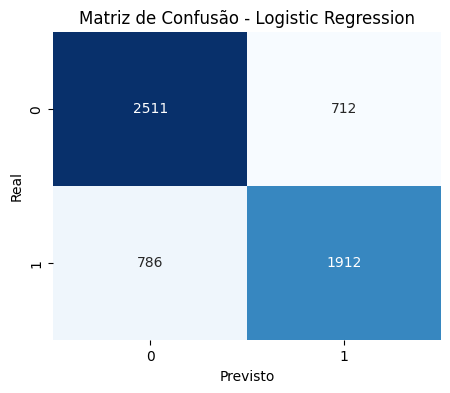

Accuracy:  0.7470
Precision: 0.7287
Recall:    0.7087
F1-score:  0.7185

O modelo erra mais ao prever alto consumo como baixo consumo.


In [33]:
# Matriz de confusão
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Logistic Regression')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"Accuracy:  {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall:    {rec_log:.4f}")
print(f"F1-score:  {f1_log:.4f}")

# Interpretação de erros
erros_baixo_log = cm_log[0,1]  # baixo consumo previsto como alto
erros_alto_log  = cm_log[1,0]  # alto consumo previsto como baixo

if erros_alto_log > erros_baixo_log:
    print("\nO modelo erra mais ao prever alto consumo como baixo consumo.")
elif erros_baixo_log > erros_alto_log:
    print("\nO modelo erra mais ao prever baixo consumo como alto consumo.")
else:
    print("\nO modelo erra igualmente para alto e baixo consumo.")

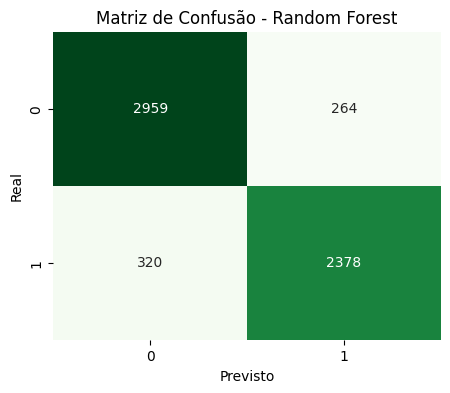

Accuracy:  0.9014
Precision: 0.9001
Recall:    0.8814
F1-score:  0.8906

O modelo erra mais ao prever alto consumo como baixo consumo.


In [34]:
# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1-score:  {f1_rf:.4f}")

# Interpretação de erros
erros_baixo_rf = cm_rf[0,1]  # baixo consumo previsto como alto
erros_alto_rf  = cm_rf[1,0]  # alto consumo previsto como baixo

if erros_alto_rf > erros_baixo_rf:
    print("\nO modelo erra mais ao prever alto consumo como baixo consumo.")
elif erros_baixo_rf > erros_alto_rf:
    print("\nO modelo erra mais ao prever baixo consumo como alto consumo.")
else:
    print("\nO modelo erra igualmente para alto e baixo consumo.")